In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# loading database
inital_data = pd.read_csv('car_price.csv')
data=inital_data.copy()

In [2]:
#data prepare
carbrand = data['CarName'].str.split(' ', expand=True)[0]
print(set(carbrand))

{'porsche', 'dodge', 'renault', 'honda', 'subaru', 'alfa-romero', 'porcshce', 'chevrolet', 'jaguar', 'Nissan', 'vw', 'buick', 'maxda', 'mazda', 'volkswagen', 'saab', 'peugeot', 'volvo', 'mitsubishi', 'mercury', 'audi', 'bmw', 'toyota', 'nissan', 'toyouta', 'isuzu', 'vokswagen', 'plymouth'}


In [3]:
carbrand = carbrand.replace({'Nissan':'nissan','vw':'volkswagen','toyouta':'toyota', 'porcshce':'porsche', 'vokswagen':'volkswagen', 'maxda':'mazda'})
print(set(carbrand))

{'porsche', 'dodge', 'renault', 'honda', 'subaru', 'alfa-romero', 'chevrolet', 'jaguar', 'buick', 'mazda', 'volkswagen', 'saab', 'peugeot', 'volvo', 'mitsubishi', 'mercury', 'audi', 'bmw', 'toyota', 'nissan', 'isuzu', 'plymouth'}


In [4]:
data['CarName']=carbrand
#data

In [5]:
#drop unrelated data
train=data.drop(['car_ID', 'CarName'], axis=1)
#train

In [6]:
#change non numeric data to numeric data (encode)
from sklearn.preprocessing import LabelEncoder 
for col in train:
    if train[col].dtype == 'object':
        train[col] = LabelEncoder().fit_transform(train[col])

#train

In [7]:
# from IPython.display import display 
# display(train.describe())

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,3.014634,2.117073,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.054765,0.795792,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,0.000000,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,3.000000,2.000000,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.000000,2.000000,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,3.000000,2.000000,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,6.000000,6.000000,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#here I try to find the outliners of each columns using 3 sigma method. However, I choose not to deducate any rows
#since I would like to keep all brand in clusters

# import pandas as pd
# import numpy as np

# def three_sigma(item): 
#     mean_value = item.mean()
#     std_value = item.std()
#     rule = (mean_value - 3 * std_value > item) | (item.mean() + 3 * item.std() < item)
#     index = np.arange(item.shape[0])[rule]
#     outrange = item.iloc[index]
#     return outrange

In [9]:
# for item in train.columns:
#     print(three_sigma(train[item]))

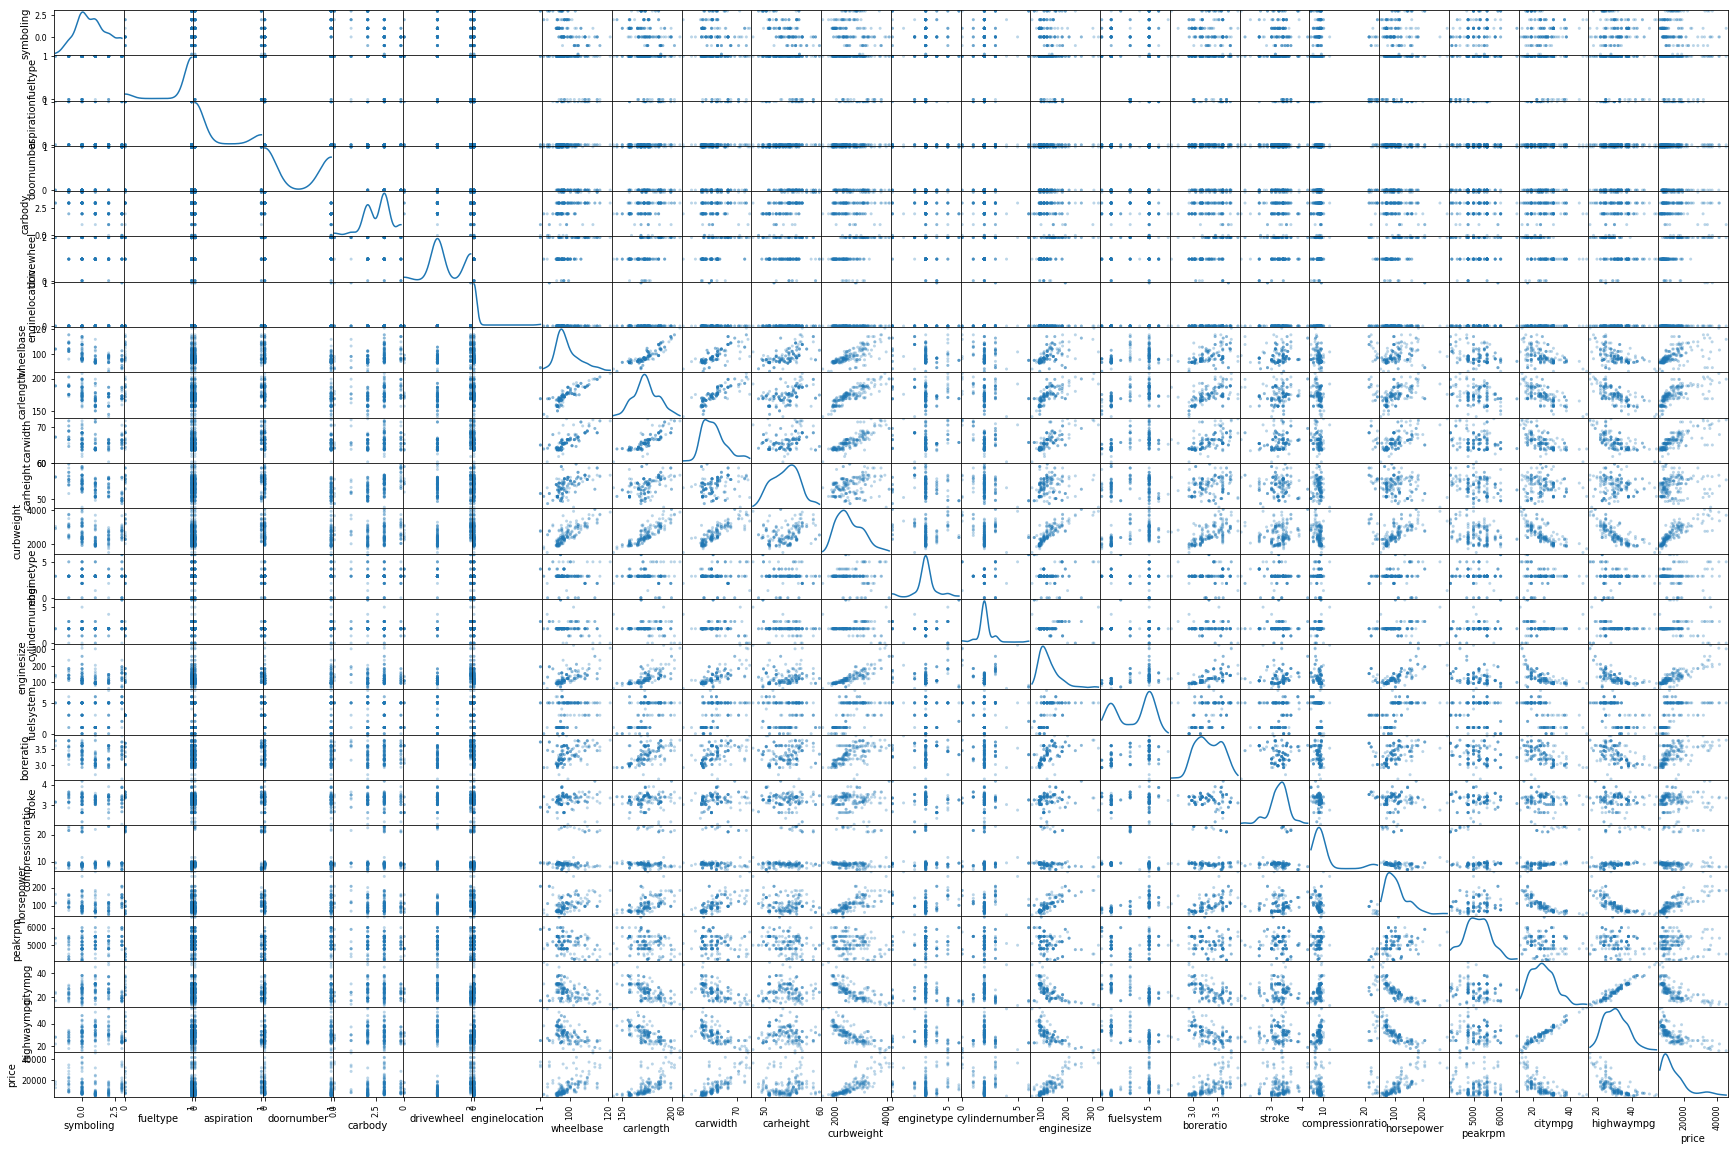

In [10]:
#plotting the covariance between every two variables
pd.plotting.scatter_matrix(train, alpha = 0.3, figsize = (30,20), diagonal = 'kde');

<AxesSubplot:>

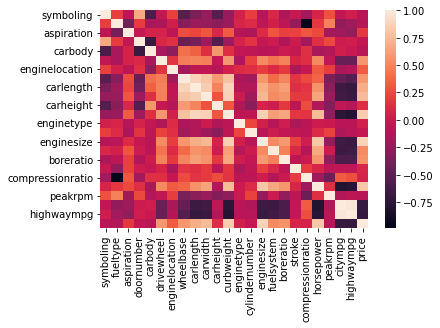

In [11]:
#visualize correlation matrix by using seaborn
import seaborn as sns
corr_df=train.corr()
sns.heatmap(corr_df)

In [12]:
#Pearson correlation coefficient and self-defined threshold 0.9
#deducate the columns which are highly correlated with other columns
threshold = 0.9
upper = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(np.bool_))
corr_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
corr_drop

['compressionratio', 'highwaympg']

In [21]:
#drop high related columns
train=train.drop(columns=['compressionratio', 'highwaympg'])
#train

In [22]:
#normalization
min_max_scaler = preprocessing.MinMaxScaler()
train = min_max_scaler.fit_transform(train)
print(train)

[[1.         1.         0.         ... 0.34693878 0.22222222 0.20795889]
 [1.         1.         0.         ... 0.34693878 0.22222222 0.28255797]
 [0.6        1.         0.         ... 0.34693878 0.16666667 0.28255797]
 ...
 [0.2        1.         0.         ... 0.55102041 0.13888889 0.40631051]
 [0.2        0.         1.         ... 0.26530612 0.36111111 0.43076312]
 [0.2        1.         1.         ... 0.51020408 0.16666667 0.43461099]]


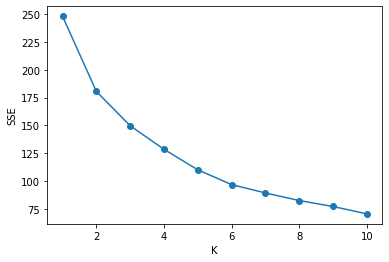

In [23]:
#elbow way to find optimal k value
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluterNum=[]
SSE = []
for i in range(1, 11):
    KM = KMeans(n_clusters=i, random_state=10)
    KM.fit(train)
    SSE.append(KM.inertia_)
    cluterNum.append(i)
X = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')

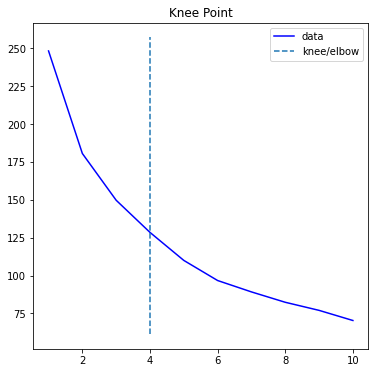

best culster number：4


In [24]:
#use kneed.KneeLocator 
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from kneed import KneeLocator

magic=KneeLocator(cluterNum,
            SSE,
            curve='convex',
            direction='decreasing',
            online=True)
BestCluterNum=magic.elbow
magic.plot_knee()
plt.show()
print("best culster number："+str(BestCluterNum))

In [25]:
kmeans = KMeans(n_clusters=BestCluterNum)
kmeans = kmeans.fit(train)
inital_data['cluter_Index'] = kmeans.labels_

In [26]:
volkswagen_data = inital_data[inital_data['CarName'].str.contains("volkswagen|vokswagen|vw")][['CarName', 'cluter_Index']]
vol_dict = dict(zip(volkswagen_data['CarName'], volkswagen_data['cluter_Index']))
#vol_dict

In [30]:
for k in vol_dict.keys():
    car_list = inital_data[inital_data['cluter_Index'] == vol_dict.get(k)]['CarName'].unique().tolist()
    car_list.remove(k)
    print('vokswagen tpe：' + k + 'has following ' + str(len(car_list)) + ' competitors.')
    print(car_list)


vokswagen tpe：vokswagen rabbithas following 33 competitors.
['chevrolet impala', 'chevrolet monte carlo', 'dodge rampage', 'dodge challenger se', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord', 'honda civic 1300', 'honda civic (auto)', 'isuzu D-Max ', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda 626', 'mazda glc custom', 'mitsubishi mirage', 'mitsubishi lancer', 'mitsubishi outlander', 'mitsubishi g4', 'Nissan versa', 'nissan gt-r', 'nissan rogue', 'nissan leaf', 'nissan juke', 'nissan clipper', 'plymouth fury iii', 'subaru', 'subaru dl', 'toyota corona mark ii', 'toyota corona', 'toyota corolla liftback', 'volkswagen 1131 deluxe sedan']
vokswagen tpe：volkswagen 1131 deluxe sedanhas following 33 competitors.
['chevrolet impala', 'chevrolet monte carlo', 'dodge rampage', 'dodge challenger se', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord', 'honda civic 1300', 'honda civic (auto)', 'isuzu D-Max ', 'maxda rx3', 'maxda glc delu

In [31]:
inital_data.to_csv("car_cluster_result.csv")